In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts

In [49]:
iris = load_iris()
X, y = iris.data, iris.target
print("Size of dataset: %d ; Feature count: %d ; labels count: %d" %(X.shape[0], X.shape[1], len(np.unique(y))))

Size of dataset: 150 ; Feature count: 4 ; labels count: 3


In [50]:
X_train, X_test, y_train, y_test = tts(X, y)
print("length of training data: %d \nlength of test data: %d" %(X_train.shape[0], X_test.shape[0]))

length of training data: 112 
length of test data: 38


In [103]:
y_names = np.array(iris['feature_names'])
dataset = pd.DataFrame(iris, columns=iris['feature_names'])

In [104]:
dataset.columns #= ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "species"]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [89]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'petal width (cm)')

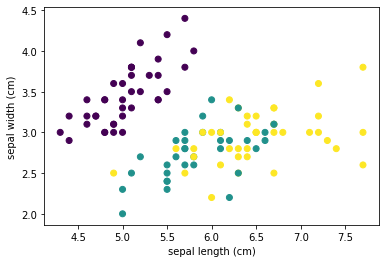

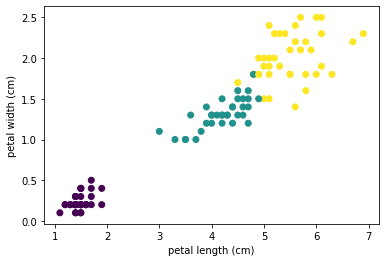

In [51]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.figure()
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

## KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
KNN = KNeighborsClassifier()
print(KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [54]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
KNN.score(X_test, y_test)

0.9473684210526315

In [56]:
KNN.predict([X_test[0]])

array([1])

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
cm = confusion_matrix(KNN.predict(X_test), y_test)

In [118]:
cm

array([[11,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 11]])

## Decision Trees

In [57]:
from sklearn import tree

In [58]:
DT = tree.DecisionTreeClassifier()
print(DT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


[Text(125.55000000000001, 199.32, 'X[3] <= 0.75\ngini = 0.665\nsamples = 112\nvalue = [39, 34, 39]'),
 Text(83.7, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 4.75\ngini = 0.498\nsamples = 73\nvalue = [0, 34, 39]'),
 Text(83.7, 126.83999999999999, 'X[0] <= 4.95\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(41.85, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(125.55000000000001, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(251.10000000000002, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.095\nsamples = 40\nvalue = [0, 2, 38]'),
 Text(209.25, 90.6, 'X[1] <= 2.6\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(167.4, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 54.359999999999985, 'X[1] <= 3.1\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(209.25, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(292.95

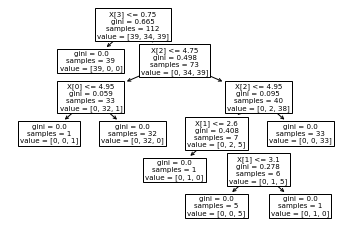

In [59]:
DT_fit = DT.fit(X_train, y_train)
tree.plot_tree(DT.fit(X_train, y_train))

In [60]:
DT.predict(X_test)

array([1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2])

In [61]:
DT.score(X_test, y_test)

0.868421052631579

In [62]:
DT.predict_proba([X_test[0]])

array([[0., 1., 0.]])

In [63]:
from sklearn.tree.export import export_text

In [64]:
export_text(DT, feature_names=iris['feature_names'])

'|--- petal width (cm) <= 0.75\n|   |--- class: 0\n|--- petal width (cm) >  0.75\n|   |--- petal length (cm) <= 4.75\n|   |   |--- sepal length (cm) <= 4.95\n|   |   |   |--- class: 2\n|   |   |--- sepal length (cm) >  4.95\n|   |   |   |--- class: 1\n|   |--- petal length (cm) >  4.75\n|   |   |--- petal length (cm) <= 4.95\n|   |   |   |--- sepal width (cm) <= 2.60\n|   |   |   |   |--- class: 1\n|   |   |   |--- sepal width (cm) >  2.60\n|   |   |   |   |--- sepal width (cm) <= 3.10\n|   |   |   |   |   |--- class: 2\n|   |   |   |   |--- sepal width (cm) >  3.10\n|   |   |   |   |   |--- class: 1\n|   |   |--- petal length (cm) >  4.95\n|   |   |   |--- class: 2\n'

#### Decision Tree for Regression

In [65]:
DTR = tree.DecisionTreeRegressor()
DTR

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
X_tmp = [[0, 0], [2, 2]]
y_tmp = [0.5, 2.5]
DTR_fit = DTR.fit(X_tmp, y_tmp)
DTR_fit
DTR.predict([[1,1],[1.01,1.01]])

array([0.5, 2.5])

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RF = RandomForestClassifier()

In [69]:
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
RF_fit = RF.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
RF.score(X_test, y_test)

0.9473684210526315

In [72]:
RF.predict([X_test[0]])

array([1])

In [73]:
RF.predict_log_proba([X_test[0]])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:635: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[       -inf, -0.10536052, -2.30258509]])

In [74]:
RF.predict_proba([X_test[0]])

array([[0. , 0.9, 0.1]])

In [75]:
RF.decision_path([X_test[1]])

(<1x130 sparse matrix of type '<class 'numpy.int64'>'
 	with 41 stored elements in Compressed Sparse Row format>,
 array([  0,  15,  22,  39,  48,  61,  82,  97, 102, 111, 130]))

## SVM 

In [76]:
from sklearn.svm import SVC

In [119]:
SVM = SVC()  #Kernel can be changed by feeding the parameter kernel='name' to this function

#Available inbuilt kernels are ['linear', 'rbf', 'poly', 'sigmoid']. You can always write your own.

In [120]:
SVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [122]:
SVM_fit = SVM.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [123]:
SVM.score(X_test, y_test)

0.9473684210526315

In [124]:
SVM.predict([X_test[0]])

array([1])

In [126]:
SVM = SVC(probability=True)
SVM.fit(X_train, y_train)
SVM.predict_proba([X_test[0]])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[0.01488578, 0.95575171, 0.02936251]])